In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Importing Data Sets

In [2]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [3]:
pd.options.display.max_columns = None


## Warmup Question 1:

- How many medical doctors are there in the train outpatient dataset?
- How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?
- Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.
- How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?
- Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?
- Do the same providers provide both inpatient and outpatient services? Summarize your finding.
- Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [4]:
#Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))


In [5]:
#Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
patient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient


In [6]:
#Merge the patient data frame and 
full_data =pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [7]:
full_data= pd.merge(full_data, train_potentialfraud, on='Provider', how='left')

In [8]:
full_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No


## Providers and Doctors

### How many medical doctors are there in the train outpatient dataset? How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?

- There are 11,605 doctors in the inpatient data and 74,110 doctors in the outpatient data.

In [9]:
print(full_data.loc[full_data.patientType=='inpatient'].AttendingPhysician.unique().shape[0])
print(full_data.loc[full_data.patientType=='outpatient'].AttendingPhysician.unique().shape[0])


11605
74110


### Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

- Most doctors have a connection of 1 clinic. 

In [10]:
physician= full_data.groupby(['AttendingPhysician','Provider'])['Provider'].count().\
reset_index(name='NumProvider').groupby(['AttendingPhysician'])['NumProvider'].count().reset_index()

print(physician.NumProvider.value_counts())


1    76844
2     4741
3      382
4       65
5       19
6        9
9        1
8        1
7        1
Name: NumProvider, dtype: int64


In [11]:
phy3 = physician.loc[physician.NumProvider==9]

phy4 = pd.concat([phy3, full_data[['AttendingPhysician', 'Provider']]], axis=1)
phy5 = pd.merge(phy4, train_potentialfraud, on='Provider', how='left')


In [12]:
phy4

,AttendingPhysician,NumProvider,AttendingPhysician,Provider
0,NaN,NaN,PHY390922,PRV55912
1,NaN,NaN,PHY318495,PRV55907
2,NaN,NaN,PHY372395,PRV56046
3,NaN,NaN,PHY369659,PRV52405
4,NaN,NaN,PHY379376,PRV56614
...,...,...,...,...
558206,NaN,NaN,PHY364188,PRV53699
558207,NaN,NaN,PHY423019,PRV53702
558208,NaN,NaN,PHY361063,PRV53676
558209,NaN,NaN,PHY403198,PRV53689


Text(0, 0.5, 'number of doctors per provider')

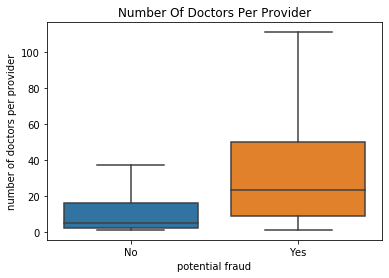

In [13]:
doctors = full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().reset_index(name='NumOfDoctors').\
groupby('Provider')['NumOfDoctors'].count().reset_index()

doctors2 = pd.merge(doctors, train_potentialfraud, on='Provider', how='left')


sns.boxplot(x='PotentialFraud', y='NumOfDoctors', data=doctors2, showfliers=False)
plt.title('Number Of Doctors Per Provider')
plt.xlabel('potential fraud')
plt.ylabel('number of doctors per provider')

## Feature Engineering
- add number of doctors

In [21]:
doctors= full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().\
reset_index(name='NumOfDoctors').groupby('Provider')['NumOfDoctors'].count().reset_index()

trainProvider = pd.merge(train_potentialfraud, doctors, on='Provider')
trainProvider.sample(2)

,Provider,PotentialFraud,NumOfDoctors
2140,PRV53667,No,3
4555,PRV56701,No,16


## Providers and Patients

### How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- There are 31,289 inpatient patients and 133,980 outpatient patients

In [ ]:
print(full_data.loc[full_data.patientType=='inpatient'].BeneID.unique().shape[0])
print(full_data.loc[full_data.patientType=='outpatient'].BeneID.unique().shape[0])


### Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?¶
We can characterize these patients by the number of providers they have. We can generate a new feature providers per patient.

In [24]:
patient= full_data.groupby(['BeneID', 'Provider', 'PotentialFraud'])['BeneID'].count().reset_index(name='NumProvider').\
groupby(['BeneID', 'PotentialFraud'])['NumProvider'].count().reset_index()


Text(0.5, 1.0, 'Proportion of Providers Per Patient')

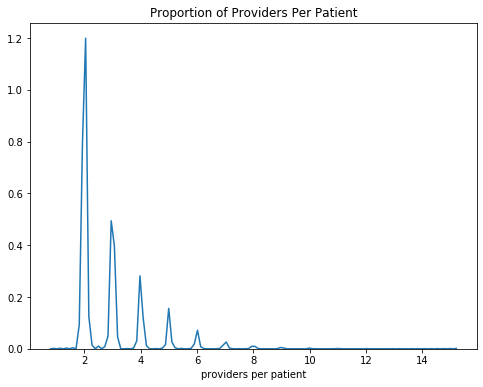

In [26]:


plt.subplots(figsize=(8,6))
sns.distplot(patient['NumProvider'], hist=False)
plt.xlabel('providers per patient')
plt.title('Proportion of Providers Per Patient')

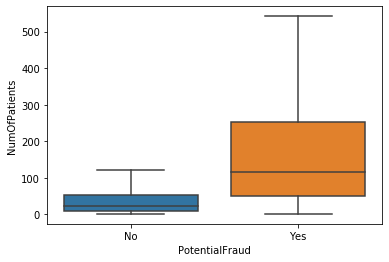

In [39]:
patients = full_data.groupby(['Provider', 'BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

provider_patient= pd.merge(patients, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='NumOfPatients', data=provider_patient, showfliers=False)


## Feature Engineering
- add number of patients

In [22]:
patient= full_data.groupby(['Provider','BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

trainProvider2 = pd.merge(trainProvider, patient, on='Provider')
trainProvider2.sample(2)

,Provider,PotentialFraud,NumOfDoctors,NumOfPatients
5255,PRV57576,No,10,21
331,PRV51423,No,1,1


## How  does providers' number of doctors and patients help detect fraud?

Text(0, 0.5, 'number of patients')

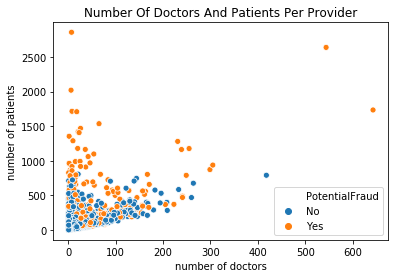

In [23]:
sns.scatterplot(x='NumOfDoctors', y='NumOfPatients', data=trainProvider2, hue='PotentialFraud')
plt.title('Number Of Doctors And Patients Per Provider')
plt.xlabel('number of doctors')
plt.ylabel('number of patients')

## Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients

In [ ]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronicCond = pd.concat([patientChronic,full_data[['patientType', 'BeneID', 'ClaimID', 'PotentialFraud']]], axis =1)

sns.boxplot(x='patientType', y='NumChronicCond',  data=chronicCond)
plt.ylabel('number of chronic conditions')
plt.xlabel('type of patient')
                       

##  Do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.




In [ ]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronicCond = pd.concat([patientChronic, full_data[['BeneID', 'PotentialFraud']]], axis =1)



In [ ]:
claims = full_data.groupby(['BeneID', 'ClaimID'])['ClaimID'].count().reset_index(name='TotClms').\
groupby('BeneID')['TotClms'].count().reset_index()


In [ ]:
chronicClaims = pd.merge(chronicCond, claims, on='BeneID')
chronicClaims

In [ ]:
sns.barplot(x='NumChronicCond', y='TotClms', data=chronicClaims, hue='PotentialFraud')
plt.title('Number Of Chronic Condions vs Total Provider Visits')
plt.xlabel('number of chronic coniditions')
plt.ylabel('total provider visits')

## Do the same providers provide both inpatient and outpatient services? Summarize your finding.

- There are 1694 providers that offer both services
- There are 398 providers that offer inpatient services only
- There are 3318 providers thar offer outpatient services only

In [42]:
a = full_data.groupby(['Provider', 'patientType'])['BeneID'].count().reset_index(name='count').\
drop('count', axis=1)

a_list= list(zip(a.Provider, a.patientType))

providerDict= {}

for ele in a_list:
    if ele[0] not in providerDict:
        providerDict[ele[0]]= ele[1]    
    else:
        providerDict[ele[0]] = 'both'
        

providerService = pd.DataFrame(providerDict.keys(), providerDict.values()).reset_index().\
rename(columns={'index':'ServiceType', 0:'Provider'})


In [43]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')


serviceFraud.groupby('ServiceType')['Provider'].count()

ServiceType
both          1694
inpatient      398
outpatient    3318
Name: Provider, dtype: int64

## Providers that offer only outpatient service have a low chance of commiting fraud. While providers that offer both services have a greater chance of commiting healthcare fraud.

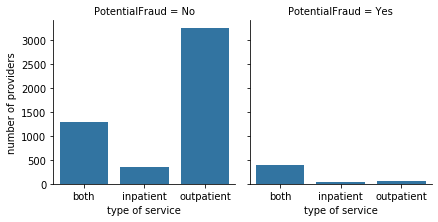

In [44]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')

service = serviceFraud.groupby(['ServiceType', 'PotentialFraud'])['Provider'].count().reset_index(name='count')


g = sns.FacetGrid(service, col="PotentialFraud")
g.map_dataframe(sns.barplot, x="ServiceType", y="count")
g.set_axis_labels("type of service", "number of providers")


## Feature Engineering
- add type of service
- add number of claims


In [46]:
trainProvider3 = pd.merge(trainProvider2, providerService, on='Provider')
trainProvider3.sample(2)

,Provider,PotentialFraud,NumOfDoctors,NumOfPatients,ServiceType
2461,PRV54065,Yes,19,71,both
1377,PRV52710,No,10,26,outpatient


In [47]:
claims= full_data.groupby(['Provider', 'ClaimID'])['ClaimID'].count().\
reset_index(name='NumOfClms').groupby('Provider')['NumOfClms'].count().reset_index()

trainProvider4 = pd.merge(trainProvider3, claims, on='Provider')
trainProvider4.sample(2)


,Provider,PotentialFraud,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms
4684,PRV56867,No,1,8,outpatient,9
4552,PRV56697,No,11,36,outpatient,78


## Warmup Question 3, Time Series Analysis:
- Based on the attribute **ClaimStartDt**, analyze the weekly service volume variations.
- What are the weekly patterns (weekly seasonalities) you observe for the demands on **inpatient** or **outpatient**
services?
- Identify the top $5$ most frequent **ClmAdmitDiagnosisCodes** and trace their weekly seasonalities.
Display the patterns you find.
- For the inpatient patients, is there any pattern between the durations of the treatments and
the patient attributes?
- For the monthly inpatient/outpatient claim counts of all the providers, please analyze the
table of provider-month matrices and report any interesting findings.

- **hint**: dataframe's pivot_table method could be used to construct the provider-month matrix.

### Based on the attribute ClaimStartDt, analyze the weekly service volume variations.

In [52]:
full_data['ClaimStartDt'] = pd.to_datetime(full_data['ClaimStartDt'])
full_data['startClaimWeek']= full_data['ClaimStartDt'].dt.week


In [53]:
weeklyClaims= full_data.groupby(['Provider','startClaimWeek', 'ClaimID'])['ClaimID'].count().reset_index(name='WeeklyClaims').\
groupby(['Provider', 'startClaimWeek'])['WeeklyClaims'].count().reset_index()


### The number of claims start to peak at week 5 and starts to go down at week 30. There is a significant drop at week 50.

Text(0.5, 1.0, 'Providers Weekly Claims')

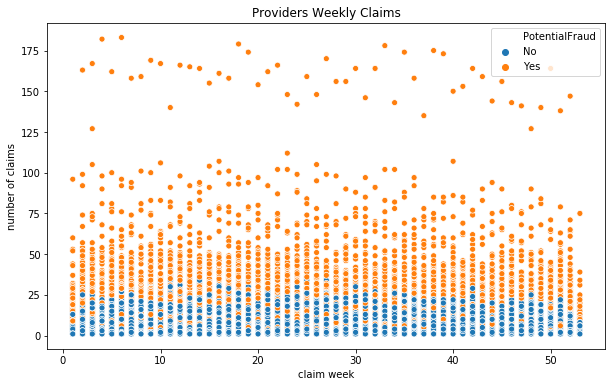

In [69]:
weeklyClaims= full_data.groupby(['Provider','startClaimWeek','ClaimID',])['ClaimID'].count().reset_index(name='WeeklyClaims').\
groupby(['Provider','startClaimWeek'])['WeeklyClaims'].count().reset_index()


weeklyClaims2 = pd.merge(weeklyClaims, train_potentialfraud, on='Provider', how='left')
weeklyClaims2

f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='startClaimWeek', y='WeeklyClaims', data=weeklyClaims2, hue='PotentialFraud')
plt.xlabel('claim week')
plt.ylabel('number of claims')
plt.title('Providers Weekly Claims')

In [65]:
weeklyClaims2

,Provider,startClaimWeek,WeeklyClaims,PotentialFraud
0,PRV51001,1,1,No
1,PRV51001,5,1,No
2,PRV51001,6,4,No
3,PRV51001,12,1,No
4,PRV51001,13,2,No
...,...,...,...,...
139414,PRV57763,48,3,No
139415,PRV57763,49,1,No
139416,PRV57763,50,1,No
139417,PRV57763,51,2,No


## Feature engineering
- add weekly claims and startClaimWeek


In [64]:
full_data.groupby(['Provider','startClaimWeek', 'ClaimID'])['ClaimID'].count().reset_index(name='WeeklyClaims')

,Provider,startClaimWeek,ClaimID,WeeklyClaims
0,PRV51001,1,CLM119495,1
1,PRV51001,5,CLM168357,1
2,PRV51001,6,CLM172987,1
3,PRV51001,6,CLM180133,1
4,PRV51001,6,CLM36844,1
...,...,...,...,...
558206,PRV57763,50,CLM718803,1
558207,PRV57763,51,CLM731006,1
558208,PRV57763,51,CLM732615,1
558209,PRV57763,52,CLM111557,1


In [73]:
trainProvider5= pd.merge(trainProvider4, weeklyClaims, on='Provider', how='left')

trainProvider5.sample(2)

,Provider,PotentialFraud,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms,startClaimWeek,WeeklyClaims
103473,PRV55940,No,21,29,outpatient,32,6,1
12319,PRV51522,No,72,169,both,190,46,2


### Duration of the treatments

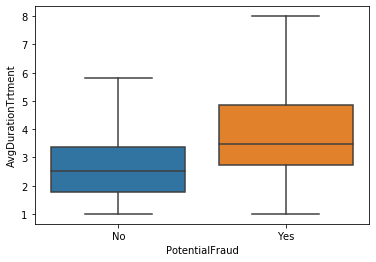

In [71]:
full_data['ClaimEndDt'] = pd.to_datetime(full_data['ClaimEndDt'])
full_data['Duration'] = full_data['ClaimEndDt'].sub(full_data['ClaimStartDt'], axis=0)/np.timedelta64(1,'D') + 1

duration = full_data.groupby(['Provider'])['Duration'].mean().reset_index(name='AvgDurationTrtment')

duration2 = pd.merge(duration, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='AvgDurationTrtment', data=duration2, showfliers=False)


## Feature Engineering

- add average duration of treatment per claims

In [74]:
trainProvider6 = pd.merge(trainProvider5, duration, on='Provider', how='left')
trainProvider6.sample(2)

,Provider,PotentialFraud,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms,startClaimWeek,WeeklyClaims,AvgDurationTrtment
48358,PRV53276,No,7,131,outpatient,291,36,4,2.268041
5343,PRV51250,No,32,71,outpatient,85,46,2,2.235294


### For the monthly inpatient/outpatient claim counts of all the providers, please analyze the table of provider-month matrices and report any interesting findings.
- hint: dataframe's pivot_table method could be used to construct the provider-month matrix.

In [86]:
full_data['startClaimMonth'] = full_data['ClaimStartDt'].dt.month

monthly = full_data.groupby(['Provider','startClaimMonth', 'ClaimID'])['ClaimID'].count().reset_index(name='MonthlyClaims').\
groupby(['Provider', 'startClaimMonth'])['MonthlyClaims'].count().reset_index()

pd.pivot_table(data=monthly, values='MonthlyClaims', index='Provider', columns=[ 'startClaimMonth']).fillna(0)

startClaimMonth,1,2,3,4,5,6,7,8,9,10,11,12
Provider,,,,,,,,,,,,
PRV51001,2.0,4.0,3.0,2.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
PRV51003,13.0,16.0,10.0,10.0,8.0,14.0,11.0,13.0,9.0,11.0,11.0,6.0
PRV51004,12.0,19.0,18.0,10.0,8.0,11.0,14.0,10.0,12.0,11.0,8.0,16.0
PRV51005,102.0,101.0,113.0,98.0,83.0,103.0,92.0,99.0,107.0,111.0,73.0,83.0
PRV51007,6.0,5.0,9.0,4.0,9.0,9.0,3.0,6.0,7.0,2.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,6.0,1.0,2.0,2.0,4.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0
PRV57760,1.0,5.0,1.0,1.0,1.0,3.0,0.0,4.0,3.0,0.0,2.0,1.0
PRV57761,5.0,6.0,4.0,5.0,8.0,10.0,5.0,5.0,4.0,14.0,11.0,5.0


Text(0.5, 1.0, 'Providers Monthly Claims')

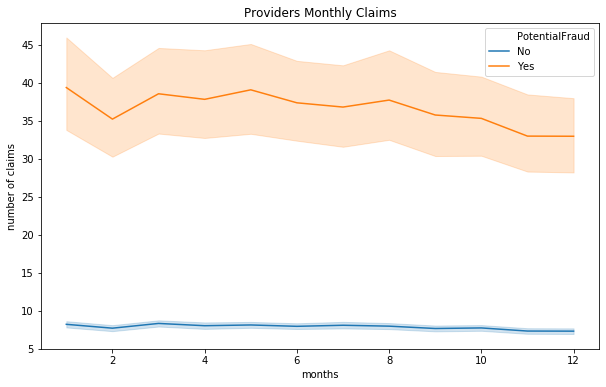

In [87]:
monthly2 = pd.merge(monthly, train_potentialfraud, on='Provider', how='left')

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='startClaimMonth', y='MonthlyClaims', data=monthly2, hue='PotentialFraud')
plt.xlabel('months')
plt.ylabel('number of claims')
plt.title('Providers Monthly Claims')

## Feature Engineering

- add monthly claims

In [88]:
trainProvider7 = pd.merge(trainProvider6, monthly, on='Provider', how='left')
traindProvider7.sample(2)

### Identify the top  5  most frequent ClmAdmitDiagnosisCodes and trace their weekly seasonalities. Display the patterns you find.

In [ ]:
clmDiagnosis = full_data.ClmAdmitDiagnosisCode.value_counts()[:5].reset_index()
clmDiagnosis = pd.DataFrame(clmDiagnosis).rename(columns={'index':'ClmAdmitDiagnosisCode', 'ClmAdmitDiagnosisCode':'count'})
clmDiagnosis

full_data.loc[(full_data.ClmAdmitDiagnosisCode=='V7612') | (full_data.ClmAdmitDiagnosisCode=='42731') |
             (full_data.ClmAdmitDiagnosisCode=='78605') | (full_data.ClmAdmitDiagnosisCode=='4019') |
             (full_data.ClmAdmitDiagnosisCode=='25000')].groupby(['Provider', 'startClaimWeek', 'ClmAdmitDiagnosisCode'])['ClmAdmitDiagnosisCode'].\
            count().reset_index(name='totalCodes').groupby(['Provider', 'startClaimWeek', 'ClmAdmitDiagnosisCode'])['totalCodes'].count()

                                


In [ ]:
clmDiagnosis = full_data.ClmAdmitDiagnosisCode.value_counts()[:5].reset_index()
clmDiagnosis = pd.DataFrame(clmDiagnosis).rename(columns={'index':'ClmAdmitDiagnosisCode', 'ClmAdmitDiagnosisCode':'count'})
clmDiagnosis


weeks = full_data[['ClmAdmitDiagnosisCode', 'startClaimWeek', 'ClaimID']].copy()

week_diag = pd.merge(weeks, clmDiagnosis, on ='ClmAdmitDiagnosisCode', how='right')
week_diag= week_diag.groupby(['ClmAdmitDiagnosisCode', 'startClaimWeek'])['ClaimID'].count().reset_index(name='numClaims')

###  Code V7612 has the highest number of claims from week 1 up to week 15 and also had the highest drops of claims.
###  Most of the codes shows a decline of claims as the week progresses.

In [ ]:
ax, f = plt.subplots(figsize=(10, 6))
sns.lineplot(data =week_diag, x= 'startClaimWeek', y= 'numClaims', hue='ClmAdmitDiagnosisCode', style='ClmAdmitDiagnosisCode')
plt.title('Weekly Claims Of Top Diagnosis Code')
plt.xlabel('week claim')
plt.ylabel('number of claims')

In [ ]:
trainProvider = pd.merge(trainProvider, duration, on='Provider', how='left')
trainProvider.sample(2)

In [ ]:
clmDiagnosis = inpatient.ClmAdmitDiagnosisCode.value_counts()[:10].reset_index()
clmDiagnosis = pd.DataFrame(clmDiagnosis).rename(columns={'index':'ClmAdmitDiagnosisCode', 'ClmAdmitDiagnosisCode':'count'})
clmDiagnosis

duration = full_data[['ClmAdmitDiagnosisCode', 'duration']].copy()

duration_diag = pd.merge(clmDiagnosis, duration, on='ClmAdmitDiagnosisCode', how='left')


### Patient with diagnosis code V5789 had the highest median duration which is around 15 days.

In [ ]:
ax, f= plt.subplots(figsize=(12, 6))
sns.violinplot(x='ClmAdmitDiagnosisCode', y='duration', data=duration_diag, showfliers=False)
plt.title('Duration Of Treatments Of Top Diagnosis Code')
plt.xlabel('diagnosis code')
plt.ylabel('duration of treatment in days')

### Warmup Question 5: From Which Providers Do the Duplicated Claims Come From?
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of
these duplicated records would signal potential fraud activities. 
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify
the duplicated claims in the inpatients_train, outpatients_train data.
- Are these potentially fradulent providers duplicating their own medical records, or are they
using the records from the other providers?
- Assuming that the claimStartDates are authentic, identify the providers which are the information
receivers. Identify the providers which are the information givers.
- Summarize the duplicate record counts/provider and study if the statistics have different
distributions between honest and potentialfraud providers.
- Do these potentially fraud providers reuse doctor IDs and/or patient IDs?  If so, these 
fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to
the other types of fraudulent activities.
- Do these duplicated records show any anomaly in terms of geographic locations?
Even though the original data doesn't specify the providers nor the doctors' practice locations,
one may use the majority of the patients' residence state/county information to infer their
physical locations.
- Base on your best knowledge of suspicious activities in duplicating the patient claims, flag
the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

### Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

In [ ]:
dup_claims = full_data.filter(regex='ClmAdmitDiagnosisCode|DiagnosisGroupCode|ClmDiagnosisCode|ClmProcedureCode')
patient_claims = full_data[['ClaimID', 'patientType']]

dup_claims = dup_claims. duplicated(keep=False).reset_index(name='dup')

dup_claims = pd.concat([patient_claims, dup_claims], axis=1).drop('index', axis=1)
dup_claims=dup_claims.loc[dup_claims.dup==True]
dup_claims

### Are these potentially fradulent providers duplicating their own medical records, or are they using the records from the other providers?

In [ ]:
provider = full_data[['ClaimID', 'Provider']].copy()

provider_dup = pd.merge(dup_claims, provider, on='ClaimID', how='left')
provider_dup.groupby('Provider')['ClaimID'].count().reset_index(name='numDupClaims')

### Assuming that the claimStartDates are authentic, identify the providers which are the information receivers. Identify the providers which are the information givers.

In [ ]:
full_data[['Provider','ClaimStartDt']]

### Market Basket Analysis (Associative Rule Mining)
- Traditionally in supermarkets or e-commerces, it is important to analyze the purchase patterns
    of their customers. For example, the retailers often want to know
     - what are the frequently purchased items?
     - conditioning on the purchasing of some item $A$ (or a set of items), 
    what other items $B$ are likely to be purchased in the same transaction?
- There are several terminologies used in **MBA**, like support, confidence, lift, conviction, which are
filtered based on the most popular **apriori** algorithm.
- **support**: sample probability of a pattern to occur in the dataset.
- **confidence**: the conditional probability of $P(B|A)={P(A,B)\over P{A}}$, where $A$, $B$ are
    two disjoint sets of items.
- **lift**: The measure of event independence $P(A,B)\over P(A)\cdot P(B)$.
- **conviction**: $P(\sim B)\over P(\sim B|A)$, which gauges whether $A\mapsto \sim B$ is purely by chance.
  $\sim B$ is the event that item sets in $B$ are **absent**, with $P(\sim B) = 1-P(B)$.  
- There are multiple python packages which handle **associative rule mining**, pip install 
**apyori** or **mlxtend** to start your **MBA**.
- In the following, we apply the machinery of **MBA** to analyze transaction-like data.

In [89]:
chronic= full_data.filter(regex='Chronic').replace(to_replace=2, value=0)
chronic.columns = [col.replace('ChronicCond_', '') for col in chronic.columns]

chronic


,Alzheimer,Heartfailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,rheumatoidarthritis,stroke
0,1,0,1,0,0,1,1,1,0,1,1
1,1,0,1,0,0,1,1,1,0,1,1
2,1,0,1,0,0,1,1,1,0,1,1
3,0,1,1,0,0,1,1,0,0,1,1
4,0,1,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
558206,1,1,0,0,0,1,1,0,0,1,0
558207,1,1,0,0,0,1,1,0,0,1,0
558208,1,1,0,0,0,1,1,0,0,1,0
558209,1,1,0,0,0,1,1,0,0,1,0


In [90]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [91]:
frequent_itemsets = apriori(chronic, min_support=0.07,  use_colnames=True)


In [92]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
7,0.759265,(IschemicHeart)
6,0.705395,(Diabetes)
1,0.590427,(Heartfailure)
47,0.588693,"(Diabetes, IschemicHeart)"
24,0.504650,"(Heartfailure, IschemicHeart)"
...,...,...
238,0.071122,"(IschemicHeart, KidneyDisease, Alzheimer, Diab..."
218,0.070878,"(ObstrPulmonary, Diabetes, Depression, rheumat..."
208,0.070755,"(Osteoporasis, ObstrPulmonary, IschemicHeart, ..."
206,0.070665,"(Osteoporasis, ObstrPulmonary, Diabetes, Kidne..."


In [108]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Heartfailure),(Alzheimer),0.590427,0.401868,0.282900,0.479145,1.192295,0.045627,1.148366
1,(Alzheimer),(Heartfailure),0.401868,0.590427,0.282900,0.703963,1.192295,0.045627,1.383521
2,(KidneyDisease),(Alzheimer),0.412002,0.401868,0.210247,0.510305,1.269833,0.044676,1.221439
3,(Alzheimer),(KidneyDisease),0.401868,0.412002,0.210247,0.523174,1.269833,0.044676,1.233150
4,(ObstrPulmonary),(Alzheimer),0.312930,0.401868,0.164965,0.527161,1.311777,0.039208,1.264981
...,...,...,...,...,...,...,...,...,...
3081,(KidneyDisease),"(Depression, IschemicHeart, Heartfailure, Obst...",0.412002,0.120816,0.087752,0.212989,1.762914,0.037975,1.117117
3082,(IschemicHeart),"(Depression, KidneyDisease, Heartfailure, Obst...",0.759265,0.092350,0.087752,0.115575,1.251480,0.017633,1.026259
3083,(Heartfailure),"(IschemicHeart, Depression, KidneyDisease, Obs...",0.590427,0.098742,0.087752,0.148624,1.505173,0.029452,1.058590
3084,(ObstrPulmonary),"(IschemicHeart, Depression, KidneyDisease, Hea...",0.312930,0.151547,0.087752,0.280420,1.850386,0.040328,1.179095


In [109]:
rules2 = rules.loc[(rules.support> 0.2)&(rules.confidence>0.5)].reset_index()

rules2

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1,(Alzheimer),(Heartfailure),0.401868,0.590427,0.282900,0.703963,1.192295,0.045627,1.383521
1,2,(KidneyDisease),(Alzheimer),0.412002,0.401868,0.210247,0.510305,1.269833,0.044676,1.221439
2,3,(Alzheimer),(KidneyDisease),0.401868,0.412002,0.210247,0.523174,1.269833,0.044676,1.233150
3,7,(Alzheimer),(Depression),0.401868,0.434807,0.216547,0.538852,1.239290,0.041812,1.225621
4,9,(Alzheimer),(Diabetes),0.401868,0.705395,0.324997,0.808717,1.146474,0.041522,1.540153
...,...,...,...,...,...,...,...,...,...,...
114,1357,"(Diabetes, Depression, IschemicHeart)",(Heartfailure),0.301339,0.590427,0.230060,0.763458,1.293060,0.052141,1.731500
115,1359,"(Heartfailure, Depression)","(Diabetes, IschemicHeart)",0.294856,0.588693,0.230060,0.780244,1.325384,0.056480,1.871656
116,1361,"(Diabetes, Depression)","(Heartfailure, IschemicHeart)",0.347843,0.504650,0.230060,0.661390,1.310591,0.054521,1.462891
117,1363,"(Depression, IschemicHeart)","(Heartfailure, Diabetes)",0.357961,0.476639,0.230060,0.642695,1.348390,0.059442,1.464746


In [95]:
import networkx as nx

<Figure size 4320x4320 with 0 Axes>

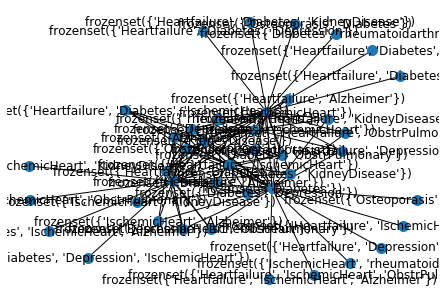

<Figure size 4320x4320 with 0 Axes>

In [110]:
G = nx.from_pandas_edgelist(rules2, 'antecedents', 'consequents', edge_attr='support')
nx.draw(G, pos=nx.spring_layout(G), node_size=100)

plt.figure(figsize=(60,60))